In [ ]:
import requests
from requests import Response
url = 'https://rate.bot.com.tw/xrt?Lang=zh-TW'
response = requests.get(url)
print(response.text)

In [4]:
from bs4 import BeautifulSoup
from pprint import pprint
soup = BeautifulSoup(response.text, 'html.parser')

# 尋找帶有特定 title 屬性的表格
rate_table = soup.find('table', {'title': '牌告匯率'})

# 取得所有幣別和現金匯率資料
currency_rows = rate_table.tbody.find_all('tr') 

rates:list[dict] = []

for row in currency_rows:
    currency_dict = {}
    # 取行中的幣別資料
    currency = row.find("td", attrs={"data-table": "幣別"}).find("div", class_="visible-phone").text.strip()
    currency_dict["幣別"] = currency

    # 取得即期買入匯率
    currency_get = row.find("td", attrs={"data-table": "本行現金買入"}).text.strip()
    currency_dict["現金買入"] = currency_get

    # 取得即期賣出匯率
    currency_send = row.find("td", attrs={"data-table": "本行現金賣出"}).text.strip()
    currency_dict["現金賣出"] = currency_send

    #print(f"幣別: {currency}, 現金買入: {currency_get}, 現金賣出: {currency_send}")
    #print("-" * 60)
    rates.append(currency_dict)

pprint(rates)
    

[{'幣別': '美金 (USD)', '現金買入': '32.345', '現金賣出': '33.015'},
 {'幣別': '港幣 (HKD)', '現金買入': '4.058', '現金賣出': '4.262'},
 {'幣別': '英鎊 (GBP)', '現金買入': '40.23', '現金賣出': '42.35'},
 {'幣別': '澳幣 (AUD)', '現金買入': '20.49', '現金賣出': '21.27'},
 {'幣別': '加拿大幣 (CAD)', '現金買入': '22.57', '現金賣出': '23.48'},
 {'幣別': '新加坡幣 (SGD)', '現金買入': '23.92', '現金賣出': '24.83'},
 {'幣別': '瑞士法郎 (CHF)', '現金買入': '35.66', '現金賣出': '36.86'},
 {'幣別': '日圓 (JPY)', '現金買入': '0.2101', '現金賣出': '0.2229'},
 {'幣別': '南非幣 (ZAR)', '現金買入': '-', '現金賣出': '-'},
 {'幣別': '瑞典幣 (SEK)', '現金買入': '-', '現金賣出': '-'},
 {'幣別': '紐元 (NZD)', '現金買入': '18.36', '現金賣出': '19.21'},
 {'幣別': '泰幣 (THB)', '現金買入': '0.8474', '現金賣出': '1.0374'},
 {'幣別': '菲國比索 (PHP)', '現金買入': '0.5', '現金賣出': '0.632'},
 {'幣別': '印尼幣 (IDR)', '現金買入': '0.00168', '現金賣出': '0.00238'},
 {'幣別': '歐元 (EUR)', '現金買入': '33.48', '現金賣出': '34.82'},
 {'幣別': '韓元 (KRW)', '現金買入': '0.0211', '現金賣出': '0.025'},
 {'幣別': '越南盾 (VND)', '現金買入': '0.00104', '現金賣出': '0.00145'},
 {'幣別': '馬來幣 (MYR)', '現金買入': '6.387', '現金賣出': '7.912'},


In [8]:
import pandas as pd
df = pd.DataFrame(rates)
print(df.T)


            0         1         2         3           4           5   \
幣別    美金 (USD)  港幣 (HKD)  英鎊 (GBP)  澳幣 (AUD)  加拿大幣 (CAD)  新加坡幣 (SGD)   
現金買入    32.345     4.058     40.23     20.49       22.57       23.92   
現金賣出    33.015     4.262     42.35     21.27       23.48       24.83   

              6         7          8          9         10        11  \
幣別    瑞士法郎 (CHF)  日圓 (JPY)  南非幣 (ZAR)  瑞典幣 (SEK)  紐元 (NZD)  泰幣 (THB)   
現金買入       35.66    0.2101          -          -     18.36    0.8474   
現金賣出       36.86    0.2229          -          -     19.21    1.0374   

              12         13        14        15         16         17  \
幣別    菲國比索 (PHP)  印尼幣 (IDR)  歐元 (EUR)  韓元 (KRW)  越南盾 (VND)  馬來幣 (MYR)   
現金買入         0.5    0.00168     33.48    0.0211    0.00104      6.387   
現金賣出       0.632    0.00238     34.82     0.025    0.00145      7.912   

             18  
幣別    人民幣 (CNY)  
現金買入      4.421  
現金賣出      4.583  


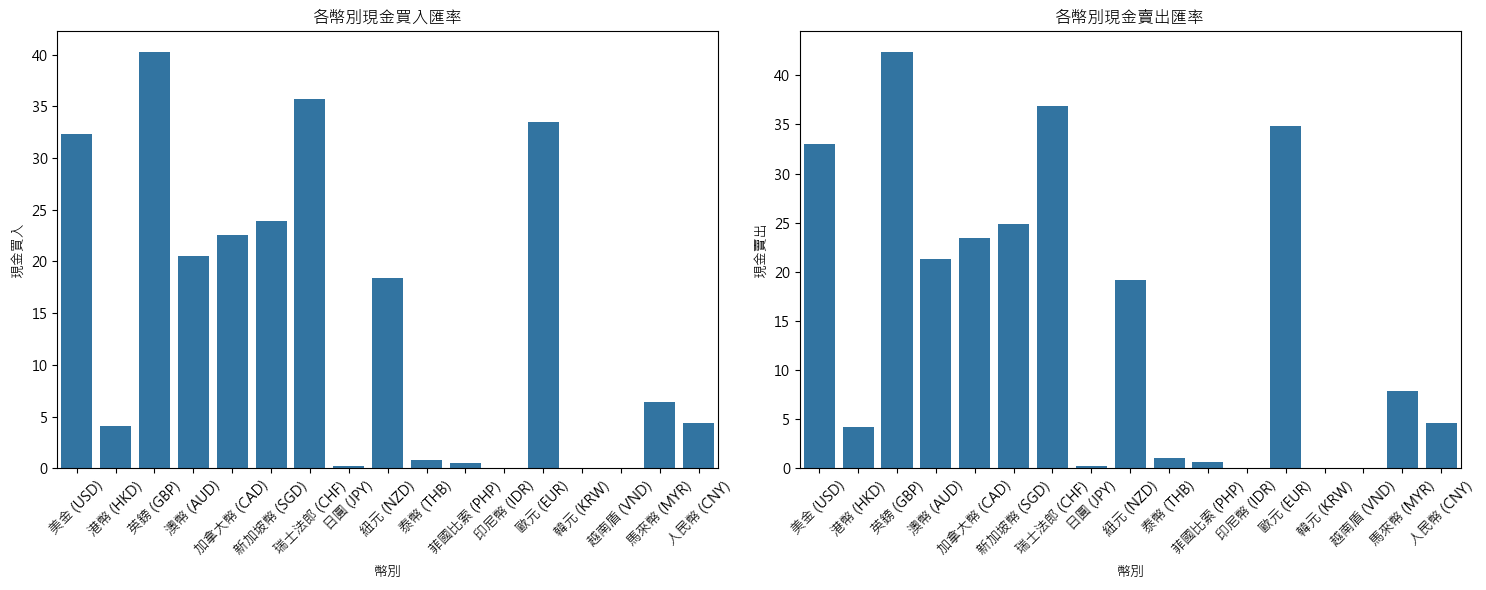

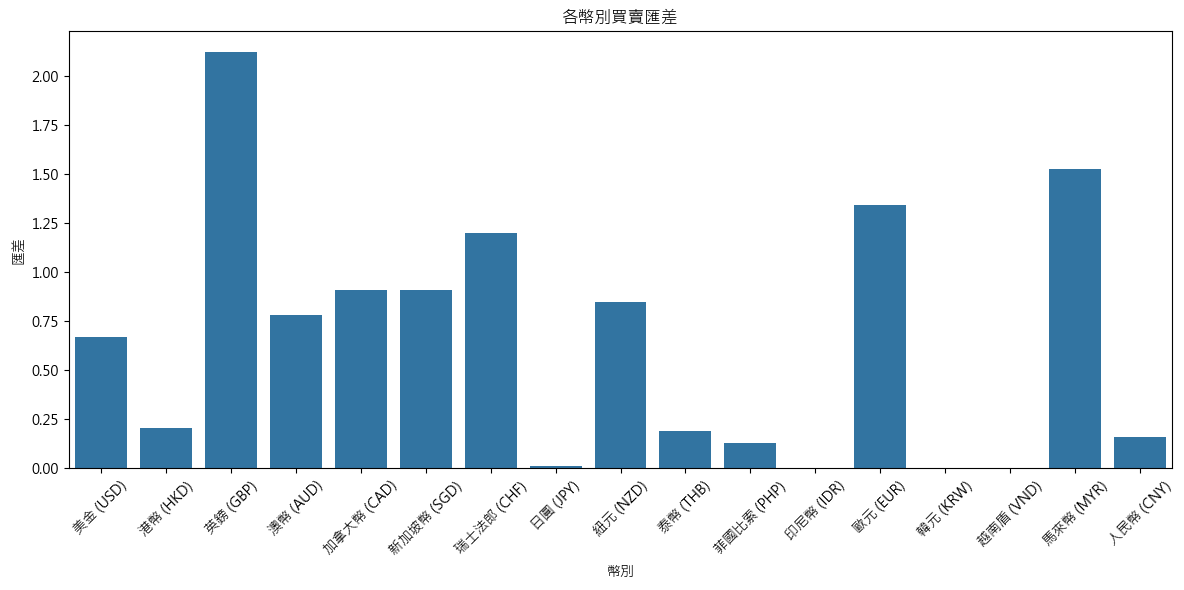


資料已儲存至 currency_rates.csv


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 設定中文字體，Windows 系統請使用以下設定
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False

# 將 list of dictionaries 轉換為 DataFrame
df = pd.DataFrame(rates)

# 轉換匯率為數值型別，將 '-' 和空值替換為 NaN
df['現金買入'] = pd.to_numeric(df['現金買入'].replace(['-', ''], np.nan), errors='coerce')
df['現金賣出'] = pd.to_numeric(df['現金賣出'].replace(['-', ''], np.nan), errors='coerce')

# 移除沒有匯率的幣別
df = df.dropna()

# 建立圖表
plt.figure(figsize=(15, 6))

# 繪製條形圖
plt.subplot(1, 2, 1)
sns.barplot(data=df, x='幣別', y='現金買入')
plt.title('各幣別現金買入匯率')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(data=df, x='幣別', y='現金賣出')
plt.title('各幣別現金賣出匯率')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 匯差分析
plt.figure(figsize=(12, 6))
df['匯差'] = df['現金賣出'] - df['現金買入']
sns.barplot(data=df, x='幣別', y='匯差')
plt.title('各幣別買賣匯差')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 存檔
df.to_csv('currency_rates.csv', encoding='utf-8-sig', index=False)
print("\n資料已儲存至 currency_rates.csv")